# Initial bad prediction

## Import needed bibs

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np 

In [52]:
features_to_be_dropped  = ['Durchschnittliche Antwortzeitintervalle','network_outgoing_pod-pod-1', 'network_outgoing_pod-pod-3',
       'network_outgoing_pod-pod-4', 'network_outgoing_pod-pod-5',
       'network_outgoing_pod-pod-9', 'network_outgoing_pod-pod-10',
       'network_outgoing_pod-pod-11', 'network_outgoing_system',
       'cpu_pod-pod-1', 'cpu_pod-pod-2', 'cpu_pod-pod-3', 'cpu_pod-pod-4',
       'cpu_pod-pod-5', 'cpu_pod-pod-6', 'cpu_pod-pod-9', 'cpu_pod-pod-11',
       'cpu_pod-pod-12', 'cpu_pod-pod-13', 'pod-restart-count-pod-1', 'pod-restart-count-pod-2',
       'pod-restart-count-pod-3', 'pod-restart-count-pod-4',
       'pod-restart-count-pod-5', 'pod-restart-count-pod-6',
       'pod-restart-count-pod-8', 'pod-restart-count-pod-10',
       'pod-restart-count-pod-11', 'pod-restart-count-pod-12',
       'pod-restart-count-pod-13', 'network_outgoing_pod-pod-14', 'cpu_pod-pod-14',
       'network_outgoing_pod-pod-15', 'network_outgoing_pod-pod-16',
       'network_outgoing_pod-pod-17', 'network_outgoing_pod-pod-18',
       'network_outgoing_pod-pod-19', 'network_outgoing_pod-pod-20',
       'network_outgoing_pod-pod-21', 'network_outgoing_pod-pod-22',
       'network_outgoing_pod-pod-23', 'network_outgoing_pod-pod-24',
       'network_outgoing_pod-pod-25', 'cpu_pod-pod-15', 'cpu_pod-pod-16',
       'cpu_pod-pod-17', 'cpu_pod-pod-18', 'cpu_pod-pod-19', 'cpu_pod-pod-20',
       'cpu_pod-pod-21', 'cpu_pod-pod-22', 'cpu_pod-pod-23', 'cpu_pod-pod-24',
       'cpu_pod-pod-25', 'pod-restart-count-pod-14',
       'pod-restart-count-pod-15', 'pod-restart-count-pod-16',
       'pod-restart-count-pod-17', 'pod-restart-count-pod-18',
       'pod-restart-count-pod-19', 'pod-restart-count-pod-20',
       'pod-restart-count-pod-21', 'pod-restart-count-pod-22',
       'pod-restart-count-pod-23', 'pod-restart-count-pod-24',
       'pod-restart-count-pod-25']

## Exchange null values with mean

In [53]:
df = pd.read_csv('./../../../timeseries/combined/combined_timeseries_final.csv')

In [54]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])))
df_imputed.columns = df.select_dtypes(include=['float64', 'int64']).columns
df_imputed['Timestamp'] = df['Timestamp']  # Timestamp (oder andere nicht-numerische Spalten) hinzufügen, falls benötigt

# Feature Selection

#### Select all features but the feature to be predicted

In [55]:
X = df_imputed.drop(features_to_be_dropped, axis=1)
y = df_imputed['Durchschnittliche Antwortzeitintervalle']

In [56]:
X.head(5)

,Timestamp,Requests je Sekunde,i_o_read,i_o_write,memory,network_outgoing_pod-pod-2,network_outgoing_pod-pod-6,network_outgoing_pod-pod-7,network_outgoing_pod-pod-8,network_outgoing_pod-pod-12,...,memory_rolling_avg_5,cpu_pod-pod-1_rolling_avg_5,cpu_pod-pod-11_rolling_avg_5,cpu_pod-pod-8_rolling_avg_5,cpu_system_cumsum,memory_cumsum,network_outgoing_system_log_scaled,memory_log_scaled,cpu_system_log_scaled,pod_restart
0,10,0.0,0.0,0.0,1.128975e+10,139.0,1001.0,4581.0,143.0,67.3,...,1.223895e+10,0.019924,0.049688,0.100637,0.00180,1.128975e+10,8.931948,23.147161,0.001798,0.0
1,12,0.0,0.0,0.0,1.128867e+10,139.0,1001.0,4548.0,158.0,67.3,...,1.223895e+10,0.019924,0.049688,0.100637,0.00366,2.257842e+10,8.929700,23.147066,0.001858,0.0
2,14,0.0,0.0,0.0,1.128932e+10,139.0,1001.0,4516.0,173.0,67.3,...,1.223895e+10,0.019924,0.049688,0.100637,0.00529,3.386774e+10,8.932609,23.147123,0.001629,0.0
3,16,0.0,0.0,0.0,1.129266e+10,139.0,2466.0,4483.0,188.0,67.3,...,1.223895e+10,0.019924,0.049688,0.100637,0.00695,4.516039e+10,9.107421,23.147418,0.001659,0.0
4,18,7.0,0.0,0.0,1.129897e+10,134.0,2466.0,4451.0,202.0,67.3,...,1.129187e+10,0.001896,0.001618,0.006194,0.00865,5.645937e+10,9.104980,23.147978,0.001699,0.0


## Modell trainieren und auswählen

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Regressor

In [58]:
model = RandomForestRegressor(n_estimators=150, random_state=42, max_depth=35, bootstrap=False, max_features=1.0)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=35, n_estimators=150,
                      random_state=42)

## Gradient Boosting Regressor

In [53]:
model = GradientBoostingRegressor(n_estimators=150, random_state=42, max_depth=None, max_features=0.8)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=None, max_features=0.8, n_estimators=150,
                          random_state=42)

## Decision Tree Regressor

In [7]:
# Trainieren des Modells
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

## Linear Regression

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluation Metrics

In [59]:
# Sie haben bereits den MSE berechnet:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Berechnung des RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Berechnung des MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Berechnung des MAPE (Mean Absolute Percentage Error)
# Achtung: MAPE erwartet, dass keine echten Werte von 0 enthalten sind, da dies zu einer Division durch Null führen würde.
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)

MSE: 628603.6944755391
RMSE: 792.8453156042099
MAE: 281.45928169232656
MAPE: 3.6996941854503496e+16


In [60]:
comparison_df = pd.DataFrame({'Tatsächliche Werte': y_test, 'Vorhersagewerte': y_pred})
# Zurücksetzen des Index, um die Zeilennummerierung zu vereinfachen
comparison_df.reset_index(drop=True, inplace=True)

print(comparison_df)

# Optional: Berechnung und Ausgabe des Mean Squared Error zur Bewertung
print("MSE:", mean_squared_error(y_test, y_pred))

      Tatsächliche Werte  Vorhersagewerte
0             177.000000       176.933333
1             169.000000       168.820000
2             955.229885       538.085195
3             110.000000        10.823529
4             104.302326       294.578674
...                  ...              ...
1148          605.472222      1125.290511
1149          341.276923       233.094324
1150         1993.364238      1932.502428
1151          110.018868       134.389998
1152          833.504132       675.368736

[1153 rows x 2 columns]
MSE: 628603.6944755391


## Plot to show residuals

IndexError: index 2771 is out of bounds for axis 0 with size 1153

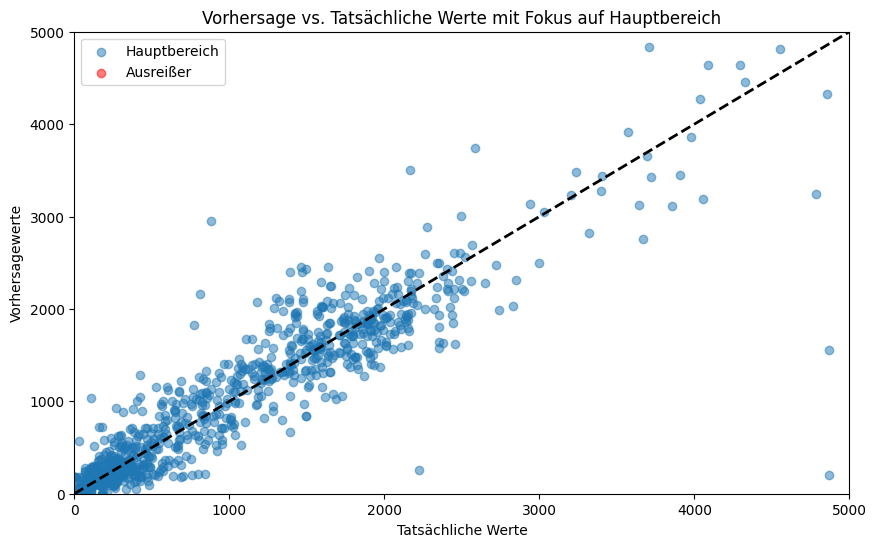

In [61]:
plt.figure(figsize=(10, 6))

# Definieren des Hauptbereichs für die Darstellung
hauptbereich_max = 5000

# Erstellen eines Scatter-Plots für Werte innerhalb des Hauptbereichs
im_hauptbereich = y_test <= hauptbereich_max
plt.scatter(y_test[im_hauptbereich], y_pred[im_hauptbereich], alpha=0.5, label='Hauptbereich')

# Optional: Hervorheben von Ausreißern mit anderer Farbe oder Marker
ausreisser = y_test > hauptbereich_max
plt.scatter(y_test[ausreisser], y_pred[ausreisser], color='red', alpha=0.5, label='Ausreißer')

# Anpassen der y-Achse des Plots, um den Fokus auf den Hauptbereich zu setzen
plt.ylim(0, hauptbereich_max)

# Anpassen der x-Achse, falls gewünscht
plt.xlim(0, hauptbereich_max)

plt.title('Vorhersage vs. Tatsächliche Werte mit Fokus auf Hauptbereich')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagewerte')
plt.plot([0, hauptbereich_max], [0, hauptbereich_max], 'k--', lw=2)  # Diagonale Linie im Hauptbereich
plt.legend()

# Optional: Ausreißer außerhalb des Plots hervorheben oder kennzeichnen
for i in y_test[ausreisser].index:
    plt.annotate(f'Ausreißer', (y_test[i], y_pred[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

## Plot with outliers

IndexError: index 2788 is out of bounds for axis 0 with size 1153

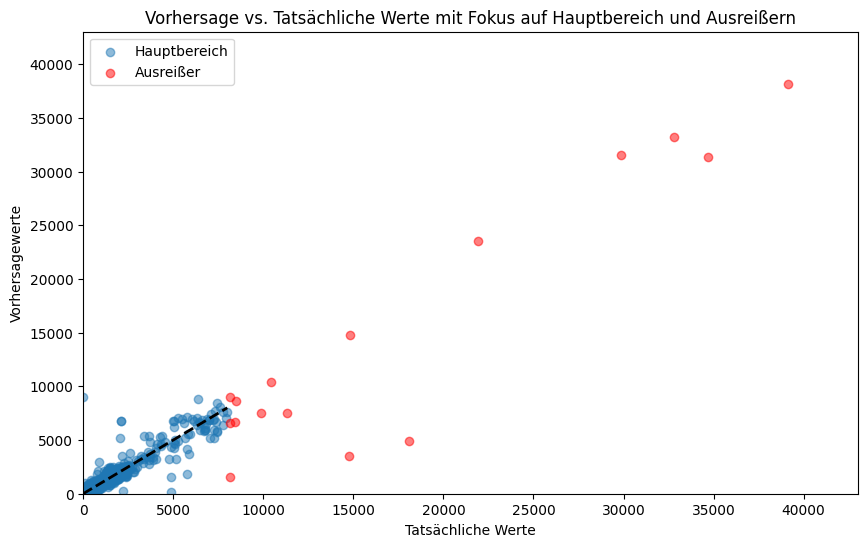

In [62]:
plt.figure(figsize=(10, 6))

# Definieren des Hauptbereichs für die Darstellung
hauptbereich_max = 8000

# Erstellen eines Scatter-Plots für Werte innerhalb des Hauptbereichs
im_hauptbereich = y_test <= hauptbereich_max
plt.scatter(y_test[im_hauptbereich], y_pred[im_hauptbereich], alpha=0.5, label='Hauptbereich')

# Hervorheben von Ausreißern mit anderer Farbe oder Marker
ausreisser = y_test > hauptbereich_max
plt.scatter(y_test[ausreisser], y_pred[ausreisser], color='red', alpha=0.5, label='Ausreißer')

# Anpassen der y-Achse des Plots, um den Fokus auf den Hauptbereich zu setzen, aber auch Ausreißer anzeigen
plt.ylim(0, max(max(y_test), max(y_pred), hauptbereich_max) * 1.1)

# Anpassen der x-Achse, um den Fokus auf den Hauptbereich zu setzen, aber auch Ausreißer anzeigen
plt.xlim(0, max(max(y_test), max(y_pred), hauptbereich_max) * 1.1)

plt.title('Vorhersage vs. Tatsächliche Werte mit Fokus auf Hauptbereich und Ausreißern')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagewerte')
plt.plot([0, hauptbereich_max], [0, hauptbereich_max], 'k--', lw=2)  # Diagonale Linie im Hauptbereich
plt.legend()

# Ausreißer außerhalb des Plots hervorheben oder kennzeichnen
for i in y_test[ausreisser].index:
    plt.annotate(f'Ausreißer', (y_test[i], y_pred[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

## Show r2 Score

In [63]:
r2 = r2_score(y_test, y_pred)
print("R²-Score:", r2)

R²-Score: 0.9133141229227268
